최종소스코드로!! 

In [8]:
#에러 코드 핸들링
import os
import warnings

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#디렉토리 -> numpy 변환
import cv2

# 이미지 -> 디렉토리 및 라벨링
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

#모델링
from keras.models import Sequential,load_model
from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Dense, Flatten, experimental, Dropout

# from tensorflow.keras.callbacks import ModelCheckpoint


import pandas as pd 




os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
warnings.filterwarnings(action='ignore')



# 데이터 증폭
train_data_augmentation = ImageDataGenerator(
    validation_split = 0.2,
    rotation_range=10,
    zoom_range = 0.3,
    width_shift_range=0.2,
    height_shift_range=0.2)

#train 데이터 설정 
train_data = train_data_augmentation.flow_from_directory(
        './images2/train',
        target_size = (300,300),
        batch_size=150,
        #color_mode ='rgb',
        classes = ['food','interior', 'exterior'],
        shuffle =True,
        class_mode='categorical')


# validation 데이터 설정
validation_data = train_data_augmentation.flow_from_directory(
        './images2/train',
        target_size = (300,300),
        batch_size=150,
        classes = ['food','interior', 'exterior'],
        shuffle =True,
        class_mode='categorical',
        subset='validation')





#test 데이터 설정
test_data = ImageDataGenerator().flow_from_directory(
        './images2/test',
        classes = ['food','interior', 'exterior'],
        target_size=(300,300),
        batch_size=30,
        shuffle =True,
        class_mode='categorical')

Found 36000 images belonging to 3 classes.
Found 7200 images belonging to 3 classes.
Found 9000 images belonging to 3 classes.


In [4]:
model = Sequential([
Input(shape=(300,300,3), name='input_layer'),
# experimental.preprocessing.Resizing(
# height=1./255, width=1./255, interpolation="nearest", name='resizing_Layer'),
# BatchNormalization(), 
experimental.preprocessing.Rescaling(1./255),
Conv2D(64,(3,3), activation='relu',name='Conv_layer1'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer2'),
Dropout(0.5),
Conv2D(64,(3,3), activation='relu',name='Conv_layer3'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer4'),

Conv2D(32,(3,3), activation='relu',name='Conv_layer5'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer6'),
Dropout(0.5),
Conv2D(16,(3,3), activation='relu',name='Conv_layer7'),
Conv2D(32,(3,3), activation='relu',name='Conv_layer8'),
MaxPooling2D(pool_size=(2,2),name='Pooling_layer9'),
Flatten(),
Dense(32, activation='relu',name='FC_layer10', kernel_initializer='glorot_uniform',),
Dense(16, activation='relu',name='FC_layer11', kernel_initializer='glorot_uniform',),
Dense(3, activation='softmax', name='output_layer')
])


# 3. 모델 학습과정 설정 및 요약
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 64)      1792      
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 149, 149, 64)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 64)      36928     
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 64)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 32)       

In [6]:
# 4. 모델 학습
history = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=20,
    validation_data=validation_data,
    validation_steps=10)
model.save('Model_Go_X')


# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_data, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_data, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_data.class_indices)
print(output)

KeyboardInterrupt: 

과적합..

In [ ]:
def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show
    
plot_loss_curve(history.history)
print(history.history)

print('train loss =', history.history['loss'][-1])
print('validation loss =', history.history['val_loss'][-1])

In [ ]:
# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

# 6. 모델 사용하기
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

In [12]:
# 영광스러운 디렉토리 -> 넘파이 어레이 변환..! 

x=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])
y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])
print(x.shape)
print(y.shape)



(9000, 300, 300, 3)
(9000, 3)


In [15]:
test_data = ImageDataGenerator().flow_from_directory(
        './image_30/test',
        classes = ['food','interior', 'exterior'],
        target_size=(300,300),
        batch_size=30,
#         shuffle =True,
        class_mode='categorical')

Found 90 images belonging to 3 classes.


In [20]:
# 변환 과정에서 라벨 수서 바뀜..
x=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])
y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])
print(x.shape)
print(y.shape)

(90, 300, 300, 3)
(90, 3)


In [28]:
# next 함수 발견
x, y = test_data.next()

[1.000 0.000 0.000]


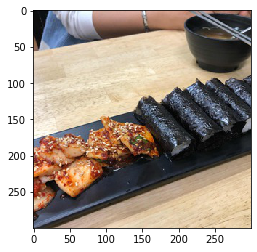

[1.000 0.000 0.000]


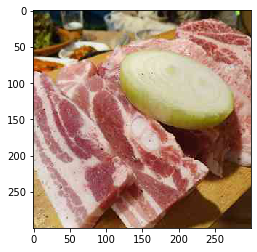

[1.000 0.000 0.000]


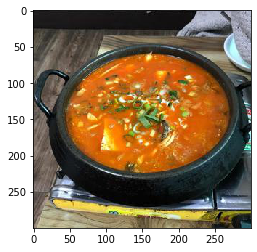

[0.000 1.000 0.000]


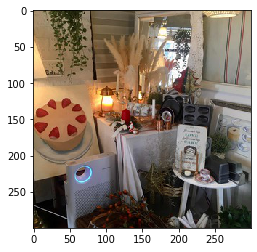

[0.000 1.000 0.000]


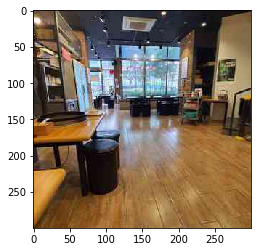

[0.000 0.000 1.000]


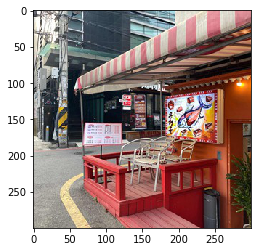

[0.000 0.000 1.000]


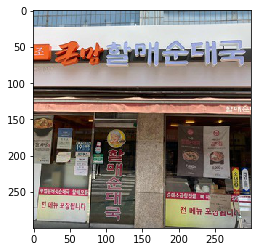

[0.000 0.000 1.000]


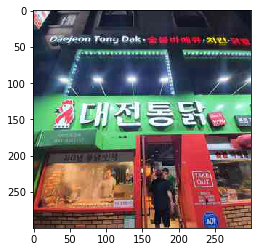

[0.000 1.000 0.000]


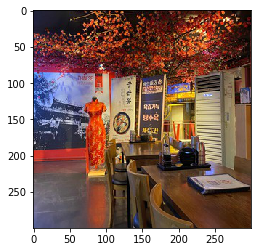

[0.000 0.000 1.000]


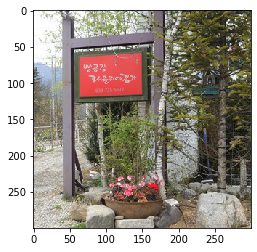

In [29]:
for i in range(10):
    print(y[i])
    pixels = np.array(x[i],np.int32)
    plt.imshow(pixels)
    plt.show()

In [ ]:
def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(9000)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
#     plt.axis("off")
#     plt.imshow(x[test_sample_id])
#      plt.show()


    #이미지로 만들기!! 
    image = cv2.cvtColor(x[test_sample_id], cv2.COLOR_BGR2RGB)
    pixels = np.array(x[test_sample_id],np.int32)
    plt.imshow(pixels)
    plt.show()

    
    test_image = test_image.reshape(1,300,300,3)
    print(test_generator.class_indices)
    y_actual = y_test[test_sample_id]
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred)

In [ ]:
if __name__ == '__main__' :
    model = load_model('model-Go_X')
    X_test , y_test = x,y
    predict_image_sample(model,X_test, y_test)